[2018-09-13 17:23:43,035] Making new env: HalfCheetah-v1



CASE 1
  STATE DIM : 17, ACTION DIM : 6
  Exp : softmax
  Strategy : Double : True,  Prioritized : True,  ACTION : RANDOM,  ACTION TRAIN 'ON'

1           -401.857
                   ( Result : -401.857,  Loss : 0,  Steps : 1000,  Global Steps : 1000 )
                   ( Action Batch  ::::  Distance : 1.9489,  Percent : 0.099%(2.827%) )
2           -714.349
                   ( Result : -1026.84,  Loss : 0,  Steps : 1000,  Global Steps : 2000 )
                   ( Action Batch  ::::  Distance : 1.9706,  Percent : 0.099%(2.679%) )
3           -834.154
                   ( Result : -1073.763,  Loss : 0,  Steps : 1000,  Global Steps : 3000 )
                   ( Action Batch  ::::  Distance : 2.0008,  Percent : 0.099%(2.282%) )
4           -892.21
                   ( Result : -1066.378,  Loss : 0,  Steps : 1000,  Global Steps : 4000 )
                   ( Action Batch  ::::  Distance : 2.0368,  Percent : 0.099%(1.984%) )
5           -882.264
                   ( Result : -842.483,  L

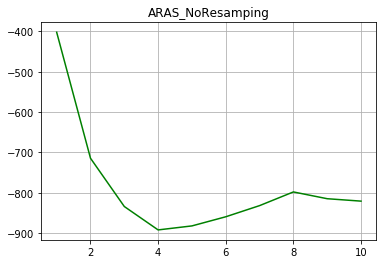

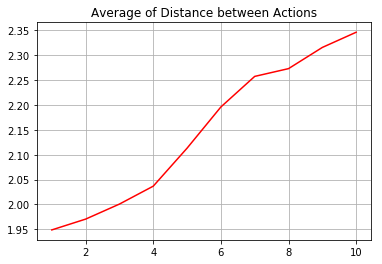

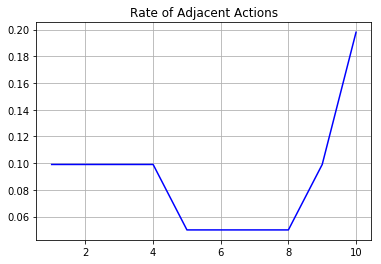

In [ ]:
import tensorflow as tf
from Strategy_NoResampling import RL

case_num = 1

# 1 : epsilon , 2 : softmax , 3 : sparsemax
Exp_list = ['epsilon', 'softmax', 'sparsemax']

action_res_list = [3, 3, 3, 3, 3, 3]

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

for i in range(case_num):
    tf.reset_default_graph()
    
    with tf.Session(config=config) as sess :
        
        CartPole = RL(sess, max_episodes = 800, size_action_batch = 64, beta_max_step = 400000,
                      
                      batch_size = 64, training_step = 1, copy_step = 1,
                      action_copy_step = 100, eps_div = 400, s_scale = 0.05,
                      layer_size_Q1 = 400, layer_size_Q2 = 300, learning_rate_Q = 0.0001, learning_rate_A = 0.1,
                      
                      action_res = action_res_list,
                      random_action = True, action_train = True, weighted_train = False, DDPG = False,
                      ending_cond_reward = 10000, save_epi = 10,
                      
                      Game = 'HalfCheetah-v1', Exp = 'softmax', seed_n = 0, Prioritized = True,
                      file_name = 'ARAS_NoResamping')
    
    sess.close()  